# Gaussian KDE Solution

Estimate a probability density function for a set of random
samples using a Gaussian Kernel Density estimator.

Create 100 normally distributed samples with mean=1.0
and std=0.0 using the stats.norm.rvs method.  Note: this means to try using SciPy instead of NumPy for generating random samples.

Use stats.kde.gaussian_kde to estimate the pdf for the
distribution of these samples.  Compare that to the analytic
pdf for the distribution as well as the histogram of the
actual samples over the interval -3, 10.

Construct a set of 200 samples from two different normal 
distributions, mean=0.0, std=0.5 and mean=5.0, std=1.0.
As with the first example, compare this against the analytic
pdf as well as the histogram of the actual samples over the
interval -3, 10.

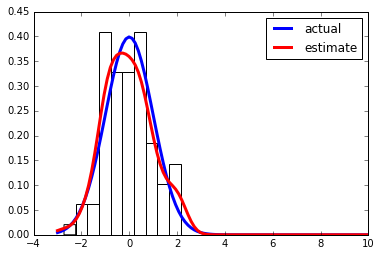

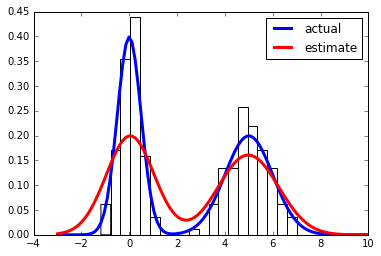

In [3]:
%matplotlib inline
from numpy import linspace, concatenate
from scipy import stats
from pylab import figure, plot, hold, legend, show, hist

# Create a normal distribution object and get 100
# samples from it.
N = 100
dist = stats.norm(0.0, 1.0)
samples = dist.rvs(size=N)

# Create gaussian_kde object with the given samples.          
distribution_estimate = stats.kde.gaussian_kde(samples)

# Evaluate the pdf using the gaussian_kde object as well
# as the analytic solution available on the stats.norm
x = linspace(-3,10,101)
y = distribution_estimate.evaluate(x)
actual = dist.pdf(x) 

# Display the results
figure()
hist(samples,bins=10,normed=True,fc='w')
plot(x, actual, 'b-', label='actual',linewidth=3)
plot(x, y, 'r-', label='estimate', linewidth=3)
legend()
show()

# Create two distributions and concatenate them into a single
# array of samples.
N=100
dist1 = stats.norm(0.0, 0.5)
dist2 = stats.norm(5.0, 1.0)
samples = concatenate([dist1.rvs(size=N), dist2.rvs(size=N)])

# Construct a gaussian_kde object from the samples and
# use it to estimate the pdf.  Also, calculate the analytic
# pdf over the same interval.               
distribution_estimate = stats.kde.gaussian_kde(samples)
y = distribution_estimate.evaluate(x)
actual =  (dist1.pdf(x) + dist2.pdf(x)) / 2.0

# Display the results
figure()
hist(samples,bins=20,normed=True,fc='w')
plot(x, actual, 'b-', label='actual',linewidth=3)
plot(x, y, 'r-', label='estimate', linewidth=3)
legend()
show()